# Simple Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('SAT-GPA.csv')

In [24]:
df.head(10)

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
5,1670,2.91
6,1764,3.00
7,1764,3.00
8,1792,3.01
9,1850,3.01


Text(0, 0.5, 'GPA')

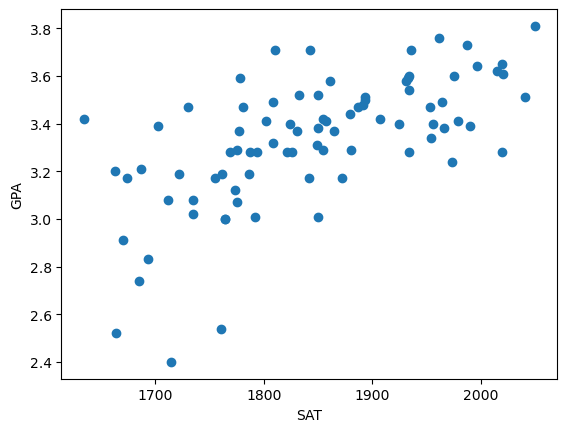

In [25]:
plt.scatter(X,y)
plt.xlabel('SAT')
plt.ylabel('GPA')

In [26]:
# correlation
df.corr()

,SAT,GPA
SAT,1.000000,0.637184
GPA,0.637184,1.000000


C:\Users\ask50\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


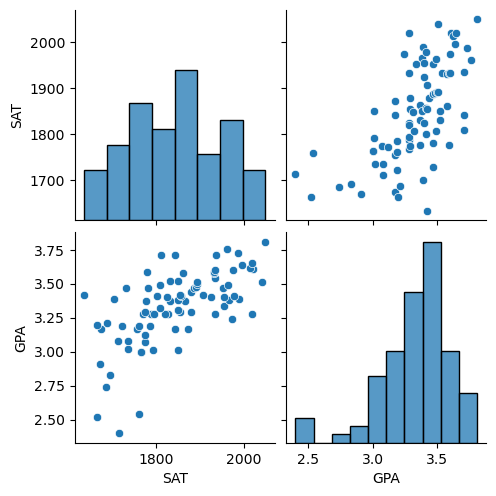

In [27]:
# seaborn pairplot
import seaborn as sns
sns.pairplot(df)

In [30]:
# Independent & dependent features
X = df[['SAT']] # independent dataset should be a dataFrame/2D array format
y = df['GPA']
X

,SAT
0,1714
1,1664
2,1760
3,1685
4,1693
...,...
79,1936
80,1810
81,1987
82,1962


In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=50)

In [44]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [46]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
# Apply simple linear Regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [96]:
y_train

1     2.52
55    3.47
25    3.28
60    3.49
81    3.73
      ... 
70    3.59
4     2.83
33    3.29
11    3.07
48    3.41
Name: GPA, Length: 63, dtype: float64

In [48]:
# To calculate the intercept for this model. obviously yes in our model.
regression.fit(X_train,y_train)

LinearRegression()

In [50]:
regression.score

<bound method RegressorMixin.score of LinearRegression()>

In [51]:
regression.coef_

array([0.17880631])

In [53]:
regression.rank_

1

In [54]:
regression.singular_

array([7.93725393])

In [56]:
regression.intercept_

3.322857142857143

In [58]:
regression.n_features_in_

1

In [66]:
regression.feature_name_

AttributeError: 'LinearRegression' object has no attribute 'feature_name_'

In [71]:
print('The coefficient of model :', regression.coef_)
print('The intercept point is :',regression.intercept_)

The coefficient of model : [0.17880631]
The intercept point is : 3.322857142857143


Text(0, 0.5, 'GPA')

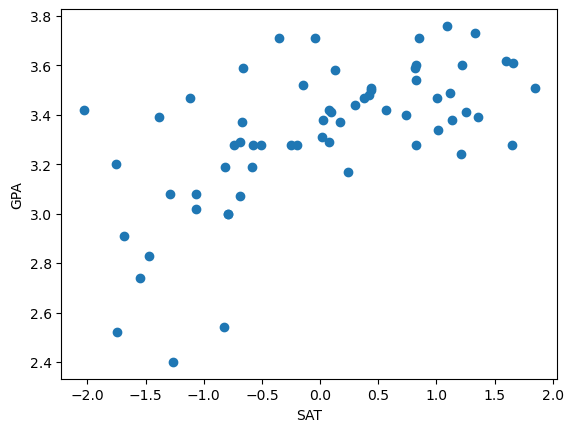

In [94]:
plt.scatter(X_train,y_train)
plt.xlabel('SAT')
plt.ylabel('GPA')

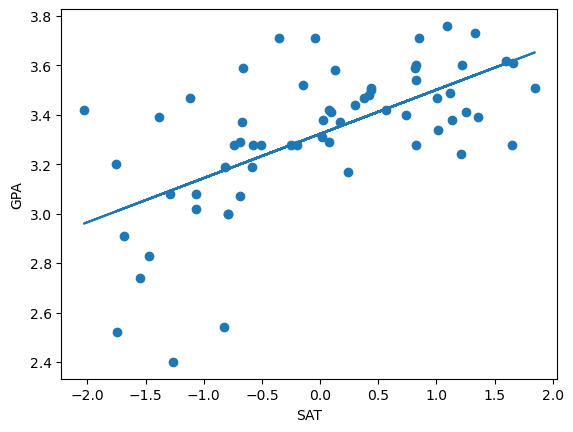

In [74]:
# plot training data best fit line
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.plot(X_train,regression.predict(X_train))

# prediction test data

    1. predicted y output = intercept + coef_('SAT')
    2. y_pred_test = 3.322857142857143 + 0.17880631(X_test)

In [76]:
# prediction test data
y_pred = regression.predict(X_test)

In [78]:
# performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [83]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

0.023549572910739874
0.13314612239708426
0.1534587009939152


In [84]:
#  r2_core
from sklearn.metrics import r2_score

In [85]:
score = r2_score(y_test,y_pred)
score

0.47466428986613995